# Electronic structure calculations with Libra: Extended Huckel Theory (EHT)

In [1]:
import os
import math
import sys
import py3Dmol

import numpy as np

# Fisrt, we add the location of the library to test to the PYTHON path
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import *

/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/import

In [2]:
import matplotlib.pyplot as plt   # plots

plt.rc('axes', titlesize=38)      # fontsize of the axes title
plt.rc('axes', labelsize=38)      # fontsize of the x and y labels
plt.rc('legend', fontsize=38)     # legend fontsize
plt.rc('xtick', labelsize=38)    # fontsize of the tick labels
plt.rc('ytick', labelsize=38)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

In [3]:
#========= STEP 1:  Create Universe and populate it ================
U = Universe(); LoadPT.Load_PT(U, os.getcwd()+"/elements.dat", verbose=0)

In [4]:
possible_systems = [  
    {"input_file":"ir-c3h4n3.xyz", "input_format":"xyz", "out_prefix":"_res_ir-c3h4n3"},
    {"input_file":"Ir-ppy-3.xyz", "input_format":"xyz", "out_prefix":"_res_ir-ppy-3"},
]

In [5]:
#=========== STEP 2:  Create system and load a molecule ================
syst = System()

my_system = possible_systems[0]

input_file = os.path.join(os.getcwd(), "molecules", my_system["input_file"] )
input_format = my_system["input_format"]
print(F"Reading the molecular file {input_file}")

LoadMolecule.Load_Molecule(U, syst, input_file, input_format)

print("Number of atoms in the system = ", syst.Number_of_atoms)
atlst1 = range(0,syst.Number_of_atoms)
print( syst.get_xyz(0, "abc", 0))

Reading the molecular file /user/ub2050/project/5_electronic_structure/1_eht/1_compact/molecules/ir-c3h4n3.xyz
27
Number of atoms in the system =  25
25
Molecule frame= 0 
Ir 0 0 -0.00703
N 0.95257 -1.52772 -1.12847
N -1.79933 -0.06109 -1.12847
C -0.48144 1.5972 1.07326
C 1.62394 -0.38166 1.07326
C 2.05923 -1.95393 -0.60615
C 2.46661 -1.35421 0.61614
N 0.84676 1.58881 -1.12847
C -1.1425 -1.21554 1.07326
C 0.66254 2.76031 -0.60615
C -0.06053 2.81325 0.61614
C -2.72177 -0.80638 -0.60615
C -2.40609 -1.45904 0.61614
H 1.87839 0.1076 2.01446
H 3.37338 -1.67269 1.1188
H 2.63818 -2.73987 -1.09173
H 1.0537 3.65467 -1.09173
H -0.2381 3.75778 1.1188
H -1.03238 1.57293 2.01446
H -3.13528 -2.08509 1.1188
H -0.84601 -1.68053 2.01446
H -3.69189 -0.9148 -1.09173
H 0.66735 -1.96559 -1.99398
H 1.36857 1.56074 -1.99398
H -2.03592 0.40485 -1.99398



In [6]:
#=========== STEP 3: Compute electronic structure ================
lstHamQM = listHamiltonian_QM("control_parameters_eht.dat", syst)
lstHamQM.compute_scf(syst)

-40.64162813000067

In [7]:
el_str = lstHamQM.get_electronic_structure()

print(F"The number of electrons = {el_str.Nelec}")
print(F"The number of orbitals = {el_str.Norb}")

print("Bands(alp)    Occupations(alp)       Bands(bet)    Occupations(bet)")
for j in range(el_str.Norb):
    print("%12.8f   %12.8f  %12.8f   %12.8f" %(el_str.get_bands_alp(j), el_str.get_occ_alp(j), el_str.get_bands_bet(j), el_str.get_occ_bet(j) ) )


The number of electrons = 63.0
The number of orbitals = 60
Bands(alp)    Occupations(alp)       Bands(bet)    Occupations(bet)
 -1.07925717     1.00000000   -1.07925717     1.00000000
 -1.07254226     1.00000000   -1.07254226     1.00000000
 -1.07254220     1.00000000   -1.07254220     1.00000000
 -0.90372687     1.00000000   -0.90372687     1.00000000
 -0.89604485     1.00000000   -0.89604485     1.00000000
 -0.89604480     1.00000000   -0.89604480     1.00000000
 -0.76538495     1.00000000   -0.76538495     1.00000000
 -0.74805049     1.00000000   -0.74805049     1.00000000
 -0.74805032     1.00000000   -0.74805032     1.00000000
 -0.66663781     1.00000000   -0.66663781     1.00000000
 -0.65766373     1.00000000   -0.65766373     1.00000000
 -0.65766350     1.00000000   -0.65766350     1.00000000
 -0.62672904     1.00000000   -0.62672904     1.00000000
 -0.62394661     1.00000000   -0.62394661     1.00000000
 -0.62394656     1.00000000   -0.62394656     1.00000000
 -0.56194721     1

In [8]:
res_prefix = my_system["out_prefix"]

#=========== STEP 4: Compute charge density for HOMO and LUMO ================
# Compute homo index
homo = el_str.Nocc_alp - 1   # index of the HOMO orbital
print(F"Index of the HOMO is {homo}")


prms = Control_Parameters()
prms.orbs = Py2Cpp_int([homo-2, homo-1, homo, homo+1, homo+2, homo+3]) 
prms.nx_grid, prms.ny_grid, prms.nz_grid = 30, 30, 30
chardens_prefix = os.path.join(os.getcwd(), res_prefix, "char_dens")
prms.charge_density_prefix = os.path.join(chardens_prefix, "")

if(os.path.exists(chardens_prefix)==False):
    os.makedirs(chardens_prefix)
    
charge_density( el_str, syst, lstHamQM.basis_ao, prms)

Index of the HOMO is 30


In [9]:
# Method 1
xyz = syst.get_xyz(0, "abc", 0)

# 
#orbitals = [homo-2, homo-1, homo, homo+1, homo+2, homo+3]
orbitals = [homo, homo+1]
N = len(orbitals)

view = py3Dmol.view(width=400,height=400, linked=False,viewergrid=(N,1))
view.setBackgroundColor('0xeeeeee')

for orb_indx in orbitals:
    i = orbitals.index(orb_indx)
    
    view.addModel(xyz,'xyz',{'vibrate': {'frames':10,'amplitude':1}}, viewer=(i,0))
    view.setStyle({'sphere':{'radius':0.5}, 'colorscheme':'Jmol' }) # uncomment this, to see the VDW rendering of the molecule
    
    res_prefix = my_system["out_prefix"]
    bohr = open(F'{res_prefix}/char_dens/_orbital_{orb_indx}.cube').read()
    view.addVolumetricData(bohr, "cube", {'isoval':  0.005, 'color': "red", 'opacity': 0.75}, viewer=(i,0))
    view.addVolumetricData(bohr, "cube", {'isoval': -0.005, 'color': "blue", 'opacity': 0.75}, viewer=(i,0))

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
# Compute DOSs
dos_dir = os.path.join(res_prefix, "dos")
prms.dos_prefix = os.path.join(dos_dir, "")

if(os.path.exists(dos_dir)==False):
    os.makedirs(dos_dir)
    
compute_dos( el_str, syst, lstHamQM.basis_ao, prms, lstHamQM.atom_to_ao_map)

In [11]:
projections = [ ["tot",range(0,syst.Number_of_atoms)],
                ["s",range(0,syst.Number_of_atoms)],
                ["p",range(0,syst.Number_of_atoms)]
              ]

res = pdos.libra_pdos(-35.0, 35.0, 0.1, projections,
              os.path.join(prms.dos_prefix, "_alpha_wfc_atom"), 
              os.path.join(prms.dos_prefix, "dos_proj.txt"),
              el_str.Nelec, do_convolve = True, _de_new = 0.1, _var = 0.1)

multiplication factor is =  1
original grid spacing =  0.00367498438131638
new grid spacing =  0.00367498438131638
gaussian variance =  0.00367498438131638


In [12]:
print( res.shape )

(700, 5)


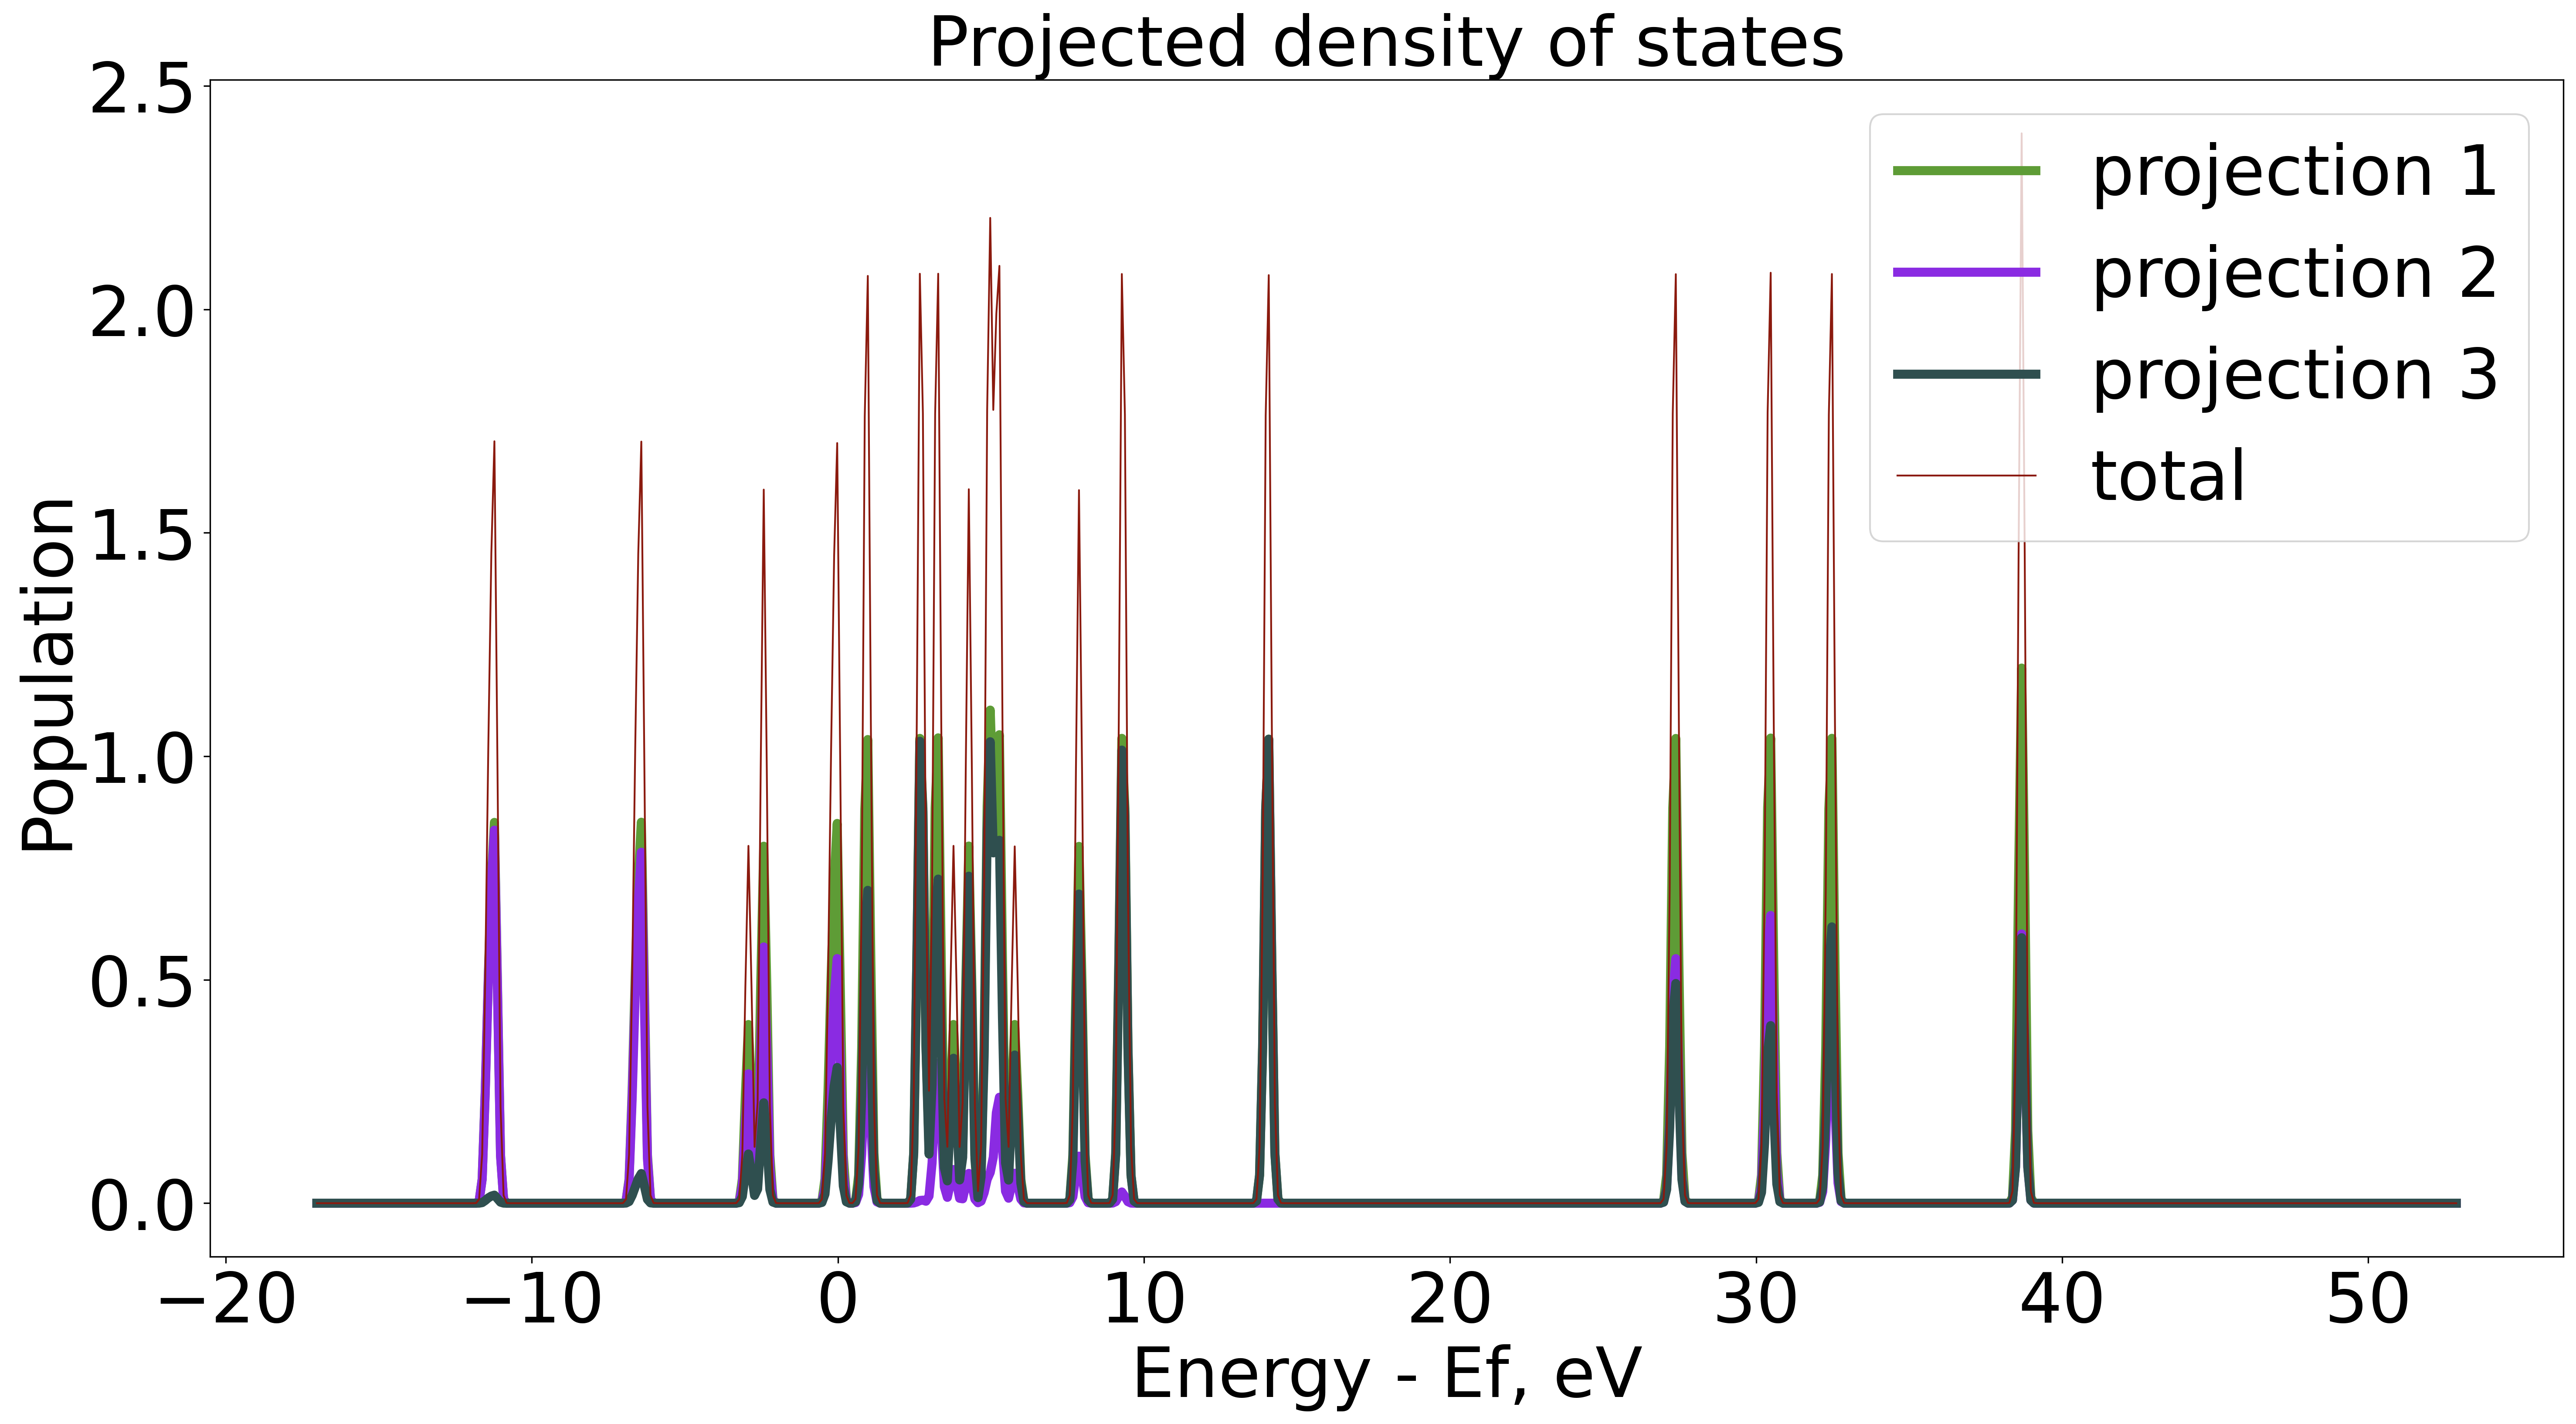

In [13]:
plt.figure(1, figsize=(24, 12), dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Projected density of states')
plt.xlabel('Energy - Ef, eV')
plt.ylabel('Population')
nproj = res.shape[1]-2
for proj in range(1, nproj+1):
    plt.plot(res[:,0], res[:, proj] , label=F'projection {proj}', linewidth=5, color = colors[ clrs_index[proj] ]) 
plt.plot(res[:,0], res[:, nproj+1] , label=F'total', linewidth=1, color = colors["11"]) 

plt.legend()
plt.show()
plt.close()